# Team Zip-G-Force Data Filters
## Post processing for acceleration data

1. Import data analysis libraries
2. Import and store the data as “RAW DATA”
 - head_raw_df
 - neck_raw_df
 - shoulder_raw_df
 - heart_raw_df
 - com_raw_df
3. Run the data through an anti-aliasing filter (F2137 qualified)
4. Store the aliased data as “RAW DATA-ALIASED”
 - head_aaflt_df
 - neck_aaflt_df
 - shoulder_aaflt_df
 - heart_aaflt_df
 - com_aaflt_df
5. Run the aliased data through a post processing filter
 - The F2137 filter is a butterworth 4 pole
 - There are other options built currently (Chebyshev, elliptical) in matlab that will be run as well
6. Store the post processed data as “PROCESSED DATA”
 - head_pp_df
 - neck_pp_df
 - shoulder_pp_df
 - heart_pp_df
 - com_pp_df
7. Display post-processed data as a set of graphs
 - Show max and min STD


### Import Libraries

In [47]:
#Imports
import pandas as pd
import numpy as np
import glob, os

# Used for plotting graphs
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go

# Create random data with numpy
from math import pi

In [48]:
os.path.exists('/Users/shellyginelle/Data/1 - Head/DATA-001.csv')

True

### Import Data
Every .CSV file records for 15 mins. The idea is to concatenate all .CSV files for each specific accelerometer positions then chop the sections into set of events: 
1. On Zip Line
 - Start
 - Arrival at Brake Mechanism
2. Offloading - Figure out the time it took for you to get back onto the Zip Line of choice

In [78]:
#Static Variables
colnames_HAM_IMU = ['Time',
            'Ax', 'Ay', 'Az', 
            'Gx', 'Gy', 'Gz', 
            'Qw', 'Qx', 'Qy', 'Qz', 
            'Mx', 'My', 'Mz', 'T'] 
colnames_HAM_IMU_ALT = ['Time',
            'Ax', 'Ay', 'Az', 
            'Gx', 'Gy', 'Gz', 
            'Qw', 'Qx', 'Qy', 'Qz', 
            'Mx', 'My', 'Mz', 'P', 'T'] 
files = glob.glob('DATA-*')

'''
1. Read all HEAD data files
'''
head_raw_dir = os.chdir("/Users/shellyginelle/Data/1 - Head/")
head_results = pd.DataFrame([], columns=colnames)

for counter, file in enumerate(files):
    head_df = pd.read_csv(file, skiprows=[0,1,2,3,4,5,6,7], sep=',', names=colnames_HAM_IMU, engine='python')
    #Append the results into one dataframe
    head_results = head_results.append(head_df)

#Save the results into a separate combined .csv
head_results.to_csv('/Users/shellyginelle/Data/1 - Head/COMBINED_HEAD_DATA.csv')

#Read combined data, rename columns and print data
head_raw_df = pd.read_csv('/Users/shellyginelle/Data/1 - Head/COMBINED_HEAD_DATA.csv', 
                 skiprows=[0,1,2,3,4,5,6,7], sep=',', names=colnames, header=None, engine='python')

'''
2. Read all NECK C7 data files
'''
neck_raw_dir = os.chdir("/Users/shellyginelle/Data/2 - Neck C7/")
neck_results = pd.DataFrame([], columns=colnames)

for counter, file in enumerate(files):
    neck_df = pd.read_csv(file, skiprows=[0,1,2,3,4,5,6,7], sep=',', names=colnames_HAM_IMU, engine='python')
    #Append the results into one dataframe
    neck_results = neck_results.append(neck_df)

#Save the results into a separate combined .csv
neck_results.to_csv('/Users/shellyginelle/Data/2 - Neck C7/COMBINED_NECK_DATA.csv')

#Read combined data, rename columns and print data
neck_raw_df = pd.read_csv("/Users/shellyginelle/Data/2 - Neck C7/COMBINED_NECK_DATA.csv", 
                 skiprows=[0,1,2,3,4,5,6,7], sep=',', names=colnames, header=None, engine='python')

'''
3. Read all SHOULDER data files
'''
shoulder_raw_dir = os.chdir("/Users/shellyginelle/Data/3 - Left Shoulder/")
shoulder_results = pd.DataFrame([], columns=colnames)

for counter, file in enumerate(files):
    shoulder_df = pd.read_csv(file, skiprows=[0,1,2,3,4,5,6,7,8], sep=',', names=colnames_HAM_IMU_ALT, engine='python')
    #Append the results into one dataframe
    shoulder_results = shoulder_results.append(shoulder_df)

#Save the results into a separate combined .csv
shoulder_results.to_csv('/Users/shellyginelle/Data/3 - Left Shoulder/COMBINED_SHOULDER_DATA.csv')

#Read combined data, rename columns and print data
shoulder_raw_df = pd.read_csv("/Users/shellyginelle/Data/3 - Left Shoulder/COMBINED_SHOULDER_DATA.csv", 
                 skiprows=[0,1,2,3,4,5,6,7], sep=',', names=colnames, header=None, engine='python')

'''
4. Read all HEART data files
'''
heart_raw_dir = os.chdir("/Users/shellyginelle/Data/4 - Heart/")
heart_results = pd.DataFrame([], columns=colnames)

for counter, file in enumerate(files):
    heart_df = pd.read_csv(file, skiprows=[0,1,2,3,4,5,6,7], sep=',', names=colnames_HAM_IMU, engine='python')
    #Append the results into one dataframe
    heart_results = heart_results.append(heart_df)

#Save the results into a separate combined .csv
heart_results.to_csv('/Users/shellyginelle/Data/4 - Heart/COMBINED_HEART_DATA.csv')

#Read combined data, rename columns and print data
heart_raw_df = pd.read_csv("/Users/shellyginelle/Data/4 - Heart/COMBINED_HEART_DATA.csv", 
                 skiprows=[0,1,2,3,4,5,6,7], sep=',', names=colnames, header=None, engine='python')

'''
5. Read all COM Harness data files
'''
com_raw_dir = os.chdir("/Users/shellyginelle/Data/5 - COM Harness/")
com_results = pd.DataFrame([], columns=colnames)

for counter, file in enumerate(files):
    com_df = pd.read_csv(file, skiprows=[0,1,2,3,4,5,6,7], sep=',', names=colnames_HAM_IMU, engine='python')
    #Append the results into one dataframe
    com_results = com_results.append(com_df)

#Save the results into a separate combined .csv
com_results.to_csv('/Users/shellyginelle/Data/5 - COM Harness/COMBINED_COM_DATA.csv')

#Read combined data, rename columns and print data
com_raw_df = pd.read_csv("/Users/shellyginelle/Data/5 - COM Harness/COMBINED_COM_DATA.csv", 
                 skiprows=[0,1,2,3,4,5,6,7], sep=',', names=colnames, header=None, engine='python')

In [75]:
#Sanity Check/Debugging - TODO
'''
#Print the first line of data of the first file appended and 
#the last line of data of the last file appended for each position
'''

'\n#Print the first line of data of the first file appended and the last line of data of the last file appended\n'

### Filter Data

In [66]:
#TODO

### Plot Data
1. Acceleration
2. G-Force
3. Quaternion

/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



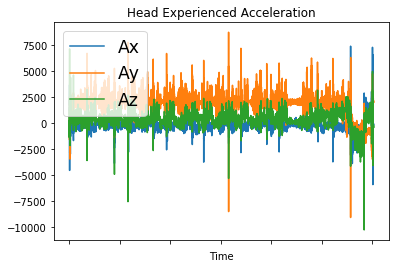

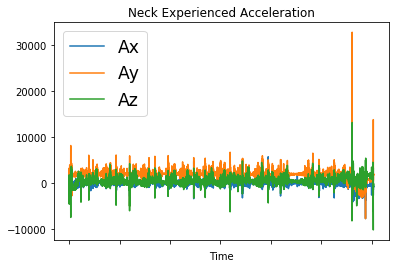

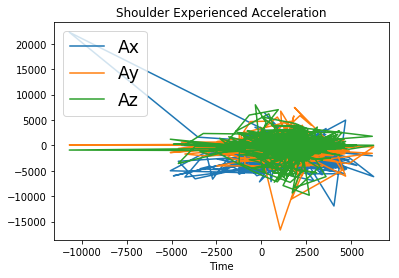

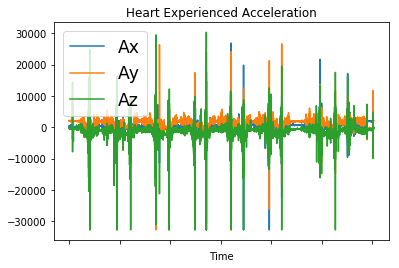

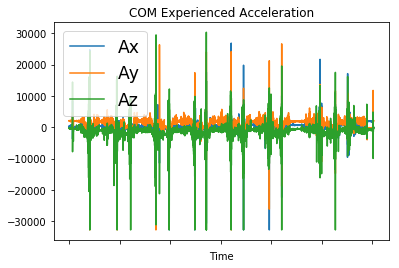

In [79]:
acceleration = ['Ax', 'Ay', 'Az']

'''
1. Plot HEAD data
'''
head_plot = head_raw_df.plot(title = 'Head Experienced Acceleration',  x = 'Time', y = acceleration)
head_plot.legend(loc=2, fontsize = 'xx-large')

'''
2. Plot NECK data
'''
neck_plot = neck_raw_df.plot(title = 'Neck Experienced Acceleration',  x = 'Time', y = acceleration)
neck_plot.legend(loc=2, fontsize = 'xx-large')

'''
3. Plot SHOULDER data
'''
shoulder_plot = shoulder_raw_df.plot(title = 'Shoulder Experienced Acceleration',  x = 'Time', y = acceleration)
shoulder_plot.legend(loc=2, fontsize = 'xx-large')

'''
4. Plot HEART data
'''
heart_plot = heart_raw_df.plot(title = 'Heart Experienced Acceleration',  x = 'Time', y = acceleration)
heart_plot.legend(loc=2, fontsize = 'xx-large')

'''
5. Plot COM data
'''
com_plot = com_raw_df.plot(title = 'COM Experienced Acceleration',  x = 'Time', y = acceleration)
com_plot.legend(loc=2, fontsize = 'xx-large')

/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



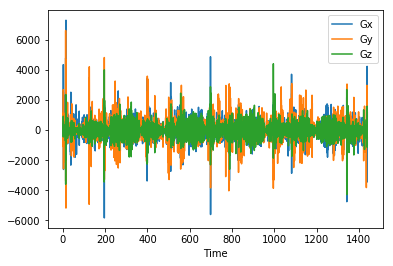

In [7]:
gyroscope = ['Gx', 'Gy', 'Gz']

'''
1. Plot HEAD data
'''
head_plot = head_raw_df.plot(title = 'Head Experienced Gyroscope',  x = 'Time', y = gyroscope)
head_plot.legend(loc=2, fontsize = 'xx-large')

'''
2. Plot NECK data
'''
neck_plot = neck_raw_df.plot(title = 'Neck Experienced Gyroscope',  x = 'Time', y = gyroscope)
neck_plot.legend(loc=2, fontsize = 'xx-large')

'''
3. Plot SHOULDER data
'''
shoulder_plot = shoulder_raw_df.plot(title = 'Shoulder Experienced Gyroscope',  x = 'Time', y = gyroscope)
shoulder_plot.legend(loc=2, fontsize = 'xx-large')

'''
4. Plot HEART data
'''
heart_plot = heart_raw_df.plot(title = 'Heart Experienced Gyroscope',  x = 'Time', y = gyroscope)
heart_plot.legend(loc=2, fontsize = 'xx-large')

'''
5. Plot COM data
'''
com_plot = com_raw_df.plot(title = 'COM Experienced Gyroscope',  x = 'Time', y = gyroscope)
com_plot.legend(loc=2, fontsize = 'xx-large')

/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



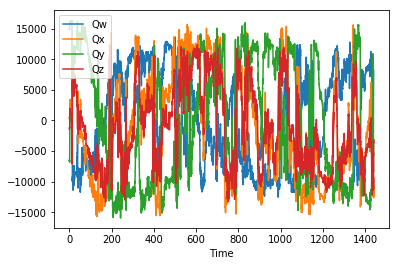

In [8]:
quarternion = ['Qw', 'Qx', 'Qy', 'Qz']

'''
1. Plot HEAD data
'''
head_plot = head_raw_df.plot(title = 'Head Experienced Quarternion',  x = 'Time', y = quarternion)
head_plot.legend(loc=2, fontsize = 'xx-large')

'''
2. Plot NECK data
'''
neck_plot = neck_raw_df.plot(title = 'Neck Experienced Quarternion',  x = 'Time', y = quarternion)
neck_plot.legend(loc=2, fontsize = 'xx-large')

'''
3. Plot SHOULDER data
'''
shoulder_plot = shoulder_raw_df.plot(title = 'Shoulder Experienced Quarternion',  x = 'Time', y = quarternion)
shoulder_plot.legend(loc=2, fontsize = 'xx-large')

'''
4. Plot HEART data
'''
heart_plot = heart_raw_df.plot(title = 'Heart Experienced Quarternion',  x = 'Time', y = quarternion)
heart_plot.legend(loc=2, fontsize = 'xx-large')

'''
5. Plot COM data
'''
com_plot = com_raw_df.plot(title = 'COM Experienced Quarternion',  x = 'Time', y = quarternion)
com_plot.legend(loc=2, fontsize = 'xx-large')